# Yolo inference with heat map generation
## Imports

In [1]:
import os
import cv2
import random
import numpy as np
from datetime import datetime
from CellDetector import CellDetector
import matplotlib.pyplot as plt
%matplotlib inline

/home/cc2/.local/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Load model

In [2]:
cell_detector = CellDetector("02_23_all_data_ft.pt")

## Load data

In [3]:
DEATH_TYPE = "Necroptosis"
CELL_TYPE = "HT29"
base_dir = "../CellDataset_MS/new_data/" + DEATH_TYPE + "/"
images_dir = base_dir + CELL_TYPE + "_phase/"
green_dir = base_dir + CELL_TYPE + "_Green/"
images = os.listdir(images_dir)
len_images = len(images)

In [4]:
image_id = random.randrange(len_images)
print(image_id)
source = images_dir + images[image_id]
source_green = green_dir + images[image_id]
print(source)

img = cv2.imread(source, cv2.IMREAD_UNCHANGED)

img_green = cv2.imread(source_green, cv2.IMREAD_UNCHANGED)
img_green = cv2.convertScaleAbs(img_green, alpha=(255.0/65535.0))
img_green = cv2.addWeighted(img_green, 8.7, np.zeros(img_green.shape, img_green.dtype), 0, 0.0)

112
../CellDataset_MS/new_data/Necroptosis/HT29_phase/VID849_B4_3_00d10h00m.png


## Predict

In [5]:
results, big_image, total_coverage = cell_detector.predict_with_heatmap(img, 0.2, 0.4, desired_coverage = 10, withImage = True, randomCrop = False)
print(np.shape(results))

Shift cropping
Total crops to execute: 1312
Total coverage of each pixel: 9

0: 128x128 (no detections), 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 17.5ms postprocess per image at shape (1, 3, 128, 128)
[]
[]

0: 128x128 (no detections), 9.7ms
Speed: 0.6ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 128)
[]
[]

0: 128x128 (no detections), 10.4ms
Speed: 0.6ms preprocess, 10.4ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 128)
[]
[]

0: 128x128 (no detections), 11.8ms
Speed: 0.7ms preprocess, 11.8ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 128)
[]
[]

0: 128x128 (no detections), 14.8ms
Speed: 0.7ms preprocess, 14.8ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 128)
[]
[]

0: 128x128 (no detections), 14.9ms
Speed: 0.7ms preprocess, 14.9ms inference, 0.8ms postprocess per image at shape (1, 3, 128, 128)
[]
[]

0: 128x128 (no detections), 15.1ms
Speed: 0.8ms preprocess, 15.1ms inference, 0.8ms postproc

## Visualize

### Heat map

In [6]:
base_image = cell_detector.gen_heatmap_mask(big_image, results, total_coverage)

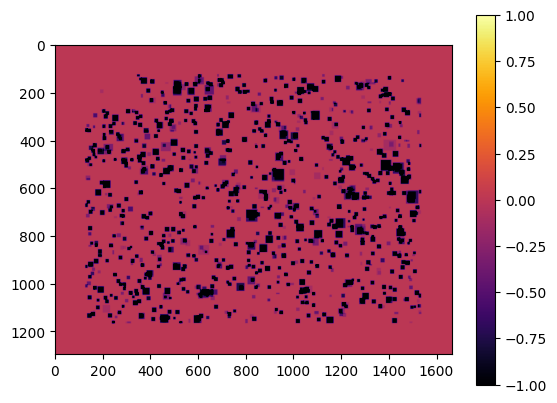

In [12]:
plt.imshow(base_image, vmin=-1, vmax=1, cmap='inferno')
plt.colorbar()
plt.show()

### Boxes

In [8]:
IF_GREEN = True
if IF_GREEN:
    image_boxed, image_green_boxed = cell_detector.box_image(big_image, results, image_green = img_green, prepare_type = 1)
else:
    image_boxed = cell_detector.box_image(big_image, results)

Text(0.5, 1.0, 'Green')

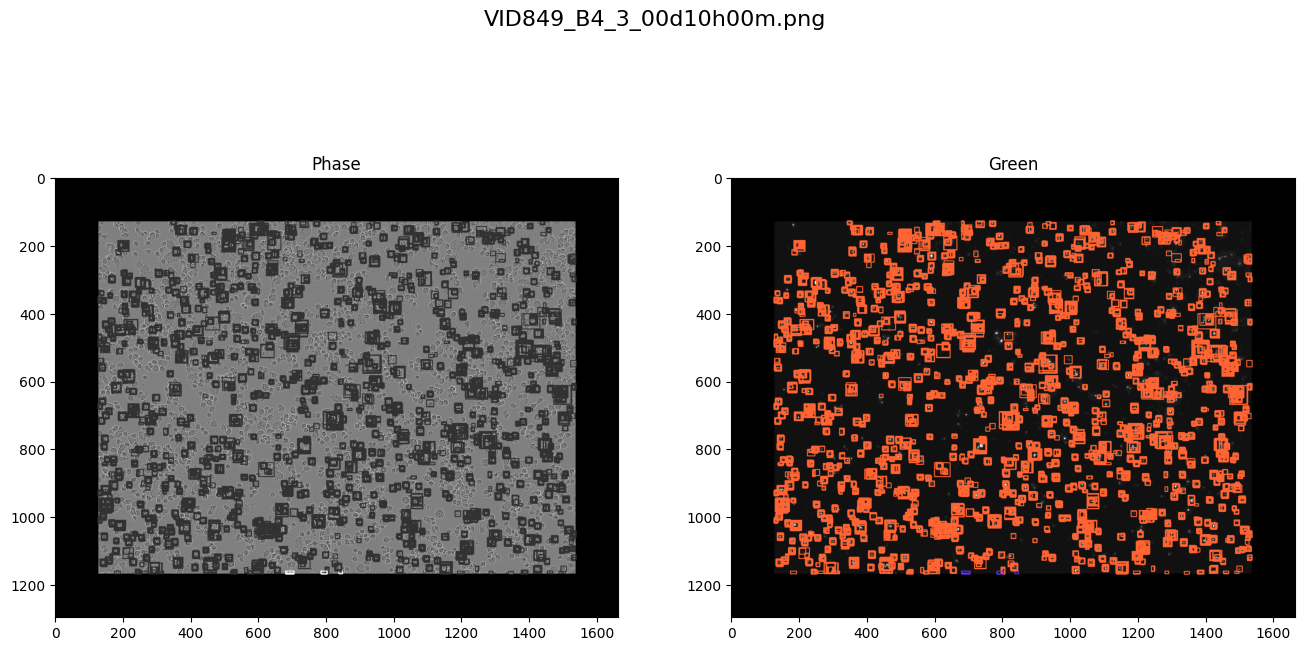

In [9]:
fig, ((ax1),(ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
fig.suptitle(str(images[image_id]), fontsize=16)

image_boxed = cv2.cvtColor(image_boxed, cv2.COLOR_BGR2RGB)

image_green_boxed = cv2.cvtColor(image_green_boxed, cv2.COLOR_BGR2RGB)


ax1.imshow(image_boxed)
ax1.set_title("Phase")

ax2.imshow(image_green_boxed)
ax2.set_title("Green")